# Linear Regression

Download the required libraries for this notebook by running the cell below. If you are using conda, uncomment and run the conda command. If you are using PIP, uncomment and use the PIP command.

COME BACK AND MAKE CONDA USE ENVIRONMENT.YML TO LOAD INSTEAD OF REQUIREMENTS.TXT

In [276]:
import sys
#!conda install --yes --prefix {sys.prefix} 
#!{sys.executable} -m pip install -r requirements.txt

In [277]:
import time
import re
import numpy as np
import pandas as pd
from scipy import stats
%matplotlib inline 
import matplotlib.pyplot as plt

# Ensures that all dataframes are displayed on one line instead of breaking columns across multiple lines
pd.set_option('display.expand_frame_repr', False)

## Import the Data

For this example, the gold medal results of olympic track and field events will be used to show linear regression in action. The medal winning times for the men's marathon from each olympic games between 1896 and 2016 will be used to draw a line of best fit. The original dataset can be found [here](https://www.kaggle.com/datasets/jayrav13/olympic-track-field-results/discussion/272523).

In [278]:
df = pd.read_csv('https://raw.githubusercontent.com/wrmthorne/linear-regression/main/olympic_data.csv', encoding='unicode_escape')

# Print some information about the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2394 entries, 0 to 2393
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       2394 non-null   object 
 1   Event        2394 non-null   object 
 2   Location     2394 non-null   object 
 3   Year         2394 non-null   int64  
 4   Medal        2394 non-null   object 
 5   Name         2164 non-null   object 
 6   Nationality  2394 non-null   object 
 7   Result       2394 non-null   object 
 8   Wind         12 non-null     float64
dtypes: float64(1), int64(1), object(7)
memory usage: 168.5+ KB
None


### Exercise 1

Extract only the men's marathon results from the full list of data and keep only the 'Year' and 'Result' columns. We are only interested in plotting the year against the time achieved for each year.

Hint: You can get a list of all of the olympic events in this dataset using df.Event.unique()

In [279]:
# Example answer
data = df[['Year', 'Result']].loc[df.Event == 'Marathon Men']

In [280]:
# Test to see whether your method returned the right results


## Preparing the data

Once we have selected the subset of data we want to use, we need to split it into each separate axis to represent. Since we are only mapping the function of two columns, we can use a function of the form:

$$
y = mx + c
$$

As our independent variable is the year and our dependent variable is the result, we assign $x$ to year and $y$ to time. Because time is in a string format in the dataset, we need to convert it to a numerical form that can be use in arithmetic. As times are represented in a number of different ways in this dataset, we will use [regular expressions](https://docs.python.org/3/library/re.html) for convert them to an integer number of seconds. If they were all in the same format, we could use a library such as [time](https://docs.python.org/3/library/time.html).

In [281]:
# Takes string time format and converts time into integer seconds
def convert_to_seconds(x):
    parsed_x = re.search(r'((?P<hours>\d+).(?P<minutes>\d+).(?P<seconds>\d+))', x)
    hours    = int(parsed_x.group('hours')) * 60 * 60
    minutes  = int(parsed_x.group('minutes')) * 60
    seconds  = int(parsed_x.group('seconds'))
    return hours + minutes + seconds

# Sort data by ascending years
data = data.sort_values(by=['Year'])

# Show first 5 y before transformation
print(f'Before Transform: {data.Result[:5].values}')

# Convert Results column to be in seconds
results_transformed = data.Result.apply(lambda x: convert_to_seconds(x))

# Show first 5 y after transformation
print(f'After Transform:  {results_transformed[:5].values}')

# Assign x and y and shape them into a column vector
x = np.array(data.Year.values).astype(float)
y = np.array(results_transformed.values).astype(float)

Before Transform: ['3-06:35' '2-58:50' '3-06:03' '3-04:17.0' '2-59:45.0']
After Transform:  [11195 10730 11163 11057 10785]


## Inspecting the Data

Now that we have our data in a computer interpretable format, we can visualise the data to inspect what we expect the result to look like. We can plot the data on a scatter plot and manully visualise where a line of best fit might pass.

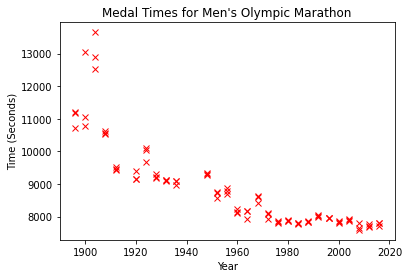

In [282]:
plt.plot(x, y, 'rx')
plt.title('Medal Times for Men\'s Olympic Marathon')
plt.xlabel('Year')
plt.ylabel('Time (Seconds)')
plt.show()

### Exercise 2

Use a numpy linspace with 100 values to draw a line, on the same plot as our x and y data, with the function:

$$
f(x) = x + 7,000
$$

Make sure not to overwite `x` and `y` with this so you can plot the original data with this line.

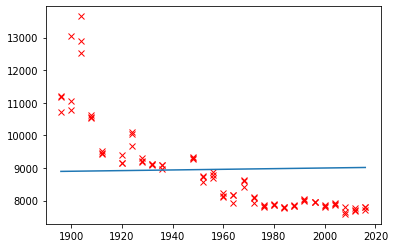

In [283]:
# Example answer
x_test = np.linspace(min(x), max(x), 100)

y_test = x_test + 7000

plt.plot(x, y, 'rx')
plt.plot(x_test, y_test)

 ## Fitting the Data
 
 You may be able to see that it doesn't fit the data very well. It roughly intersects the data but it doesn't follow the trend of the data well and would make a very poor prediction. This is finally where linear regression comes into play. Linear regression uses linear algebra to mathematically solve for variables $m$ and $c$ in the above formula to minimise the sum of squares error:

 $$
 E(m, c) = \sum^{n}_{i=1}(y_i - (mx_i + c))^2
 $$

 If you are interested in the maths of linear regression, it will be covered in the extension section of this notebook. In the extension section, linear regression will be implemented manually in numpy to better understand how it functions. This section will cover how to use the [stats.lingress](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.linregress.html) method from [SciPy](https://docs.scipy.org/doc/scipy-0.14.0/reference/index.html).

 SciPy is a collection of mathematical algorithms and functions, built on numpy, to enable a user to easily perform complex tasks with simple methods. Although you have less granular control than other libraries which perform a similar task such as [scikit-learn](https://scikit-learn.org/stable/), the wrapper is simple and easy to use. In fact, to perform linear regression on our processed data, we only need one line of code:

In [284]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

The important returned parameters for our function $y = mx + c$ are slope and intercept, representing $m$ and $c$, respectively. r_value represents the [correlation coefficient](https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/), p_value is a [two-sided p test](https://stattrek.com/regression/slope-test.aspx) and the std_err is the standard error of the estimate, which is of the form:

$$
SE = \frac{\sigma}{\sqrt{n}}
$$

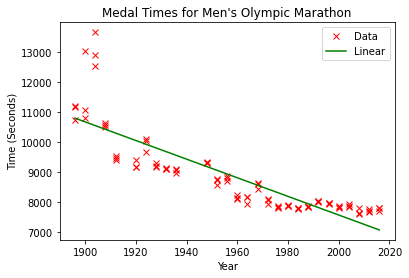

In [285]:
y_lin = slope * x + intercept

plt.plot(x, y, 'rx', label='Data')
plt.plot(x, y_lin, 'g-', label='Linear')
plt.title('Medal Times for Men\'s Olympic Marathon')
plt.xlabel('Year')
plt.ylabel('Time (Seconds)')
plt.legend()
plt.show()

### Exercise 3

Repeat the steps above to plot the data of the women's 100m and calculate and plot the line of best fit.

Be careful to remove any missing data (e.g. None, NaN values in the dataframe). Normally for this data, `df.dropna()` will remove any of these rows but in this dataset, missing data is represented with a string 'None' so we have to use a work around: `df.mask(df.eq('None')).dropna()`

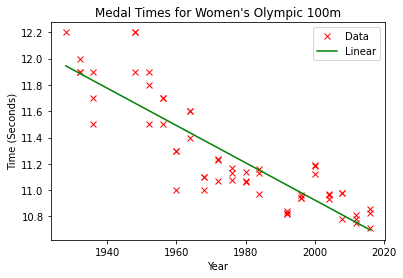

In [286]:
# Example answer
data = df[['Year', 'Result']].loc[df.Event == '100M Women'].sort_values(by=['Year']).mask(df.eq('None')).dropna()

x = np.array(data.Year.values).astype(float)
y = np.array(data.Result.values).astype(float)

slope, intercept, _, _, _ = stats.linregress(x, y)

y_lin = slope * x + intercept

plt.plot(x, y, 'rx', label='Data')
plt.plot(x, y_lin, 'g-', label='Linear')
plt.title('Medal Times for Women\'s Olympic 100m')
plt.xlabel('Year')
plt.ylabel('Time (Seconds)')
plt.legend()
plt.show()

## Improving Our Line of Best Fit

Although our line of best fit generally covers the points, it would still make a bad prediction of the next olympic's gold medal pace. This is because we have applied a linear function to a non-linear distribution of points. This is a limitation of linear regression in its fundamental form but it can be built upon using basis functions.

A basis function $\phi$ directly transforms the original input space $x$, meaning a set of linear parameters (no powers) can still be used for $m$ and $c$, but a non-linear line of best fit can be represented. Simply put, our function to optimise remains the same, but on a transformed variable:

$$
y = mx + c
$$
$$
y = m\phi(x) + c
$$

Any function can be used as a basis function but a common basis function is polynomial:

$$
\phi{_j}(x_i^j)
$$
$$
\Phi(x) = x + x^2 + x^3 \dots + x^n
$$

For us to use basis functions, we need to first transform our data for $x$ into a new form called a design matrix.

### Exercise 4

Create a design matrix where the data for $x$ is represented in a 2D array of the form:

$$
X = \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_n \end{bmatrix}
$$

Hint: look at `np.ones` and `np.hstack`. Alternatively, look at `np.ones_like`

In [287]:
# Example answer
x_vec = x.reshape(-1, 1)
X = np.hstack((np.ones_like(x_vec), x_vec))

### Exercise 5

Write a function to calculate the polynomial basis function for input data $x$ (not design matrix as input, just original data) which outputs $\Phi(X)$ in the following form:

$$
\Phi(X) = \begin{bmatrix}
1 & x_1 & x_1^2 \\
1 & x_2 & x_2^2 \\
\vdots & \vdots & \vdots \\
1 & x_n & x_n^2 \\
\end{bmatrix}
$$

As a bonus, allow the function to take a parameter to control the number of polynomial terms.

In [288]:
# Example answer
def polynomial(x, num_basis=4):
    x = x.reshape(-1, 1)
    phi = np.zeros((x.shape[0], num_basis))
    for i in range(num_basis):
        phi[:, i:i+1] = x**i
    return phi

#print(polynomial(x))

## Plot New Line of Best Fit

In [289]:
# Need multiple regression method or milti-variate linear regression method

## Extension: The Maths

If you are interested in the maths of linear regression, this section will cover how to implement linear regression manually in numpy. This will also cover the underlying linear algebra involved and generally dig deeper into the topic. If you want every last step in the derivation of all of these formulas, they can be found in [this article](https://towardsdatascience.com/understanding-linear-regression-eaaaed2d983e) and in many other places online.

As stated before, the aim of linear regression is to algebraically solve for $m$ and $c$ in a function of the form:

$$
y = mx + c
$$

There are two ways of minimising the loss w.r.t $m$ and $c$. It can be solved using linear algebra (the method which will be covered here) or it can be performed iteratively, that is, by updating the values by a incremental amount ([learning rate](https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/)) at each iteration of a loop. This is known as [gradient descent](https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21) and is the primary algorithm used on extremely large models where there is too much data to store in memory at any one time to solve algebraically.

All standard models of linear regression will make use of matrix multiplication. If you haven't used matrices before, [khan academy](https://www.khanacademy.org/math/precalculus/x9e81a4f98389efdf:matrices/x9e81a4f98389efdf:mat-intro/v/introduction-to-the-matrix) has a really good series on them. We will first cover how to use matrices in numpy.

In [290]:
# Define matrix A and matrix B (2D numpy arrays)
A = np.random.randint(1, 5, size=(4, 4))
B = np.random.randint(1, 5, size=(4, 4))

print(A, end='\n\n')
print(B)

[[2 4 4 1]
 [4 2 1 4]
 [2 3 2 1]
 [4 1 2 3]]

[[2 4 2 1]
 [3 1 1 4]
 [2 1 1 3]
 [1 2 2 3]]


The dot and outer products of matrices can be performed in numpy simply. Dot product can be performed using `np.dot()` (or `@` but it is very [slightly different](https://stackoverflow.com/questions/34142485/difference-between-numpy-dot-and-python-3-5-matrix-multiplication) in some cases) and the outer product can be calculated with `np.outer()`

In [291]:
# np.dot() and @ are basically equivalent
print(np.dot(A, B), end='\n\n')
print(A @ B, end='\n\n')

print(np.outer(A, B))

[[25 18 14 33]
 [20 27 19 27]
 [18 15 11 23]
 [18 25 17 23]]

[[25 18 14 33]
 [20 27 19 27]
 [18 15 11 23]
 [18 25 17 23]]

[[ 4  8  4  2  6  2  2  8  4  2  2  6  2  4  4  6]
 [ 8 16  8  4 12  4  4 16  8  4  4 12  4  8  8 12]
 [ 8 16  8  4 12  4  4 16  8  4  4 12  4  8  8 12]
 [ 2  4  2  1  3  1  1  4  2  1  1  3  1  2  2  3]
 [ 8 16  8  4 12  4  4 16  8  4  4 12  4  8  8 12]
 [ 4  8  4  2  6  2  2  8  4  2  2  6  2  4  4  6]
 [ 2  4  2  1  3  1  1  4  2  1  1  3  1  2  2  3]
 [ 8 16  8  4 12  4  4 16  8  4  4 12  4  8  8 12]
 [ 4  8  4  2  6  2  2  8  4  2  2  6  2  4  4  6]
 [ 6 12  6  3  9  3  3 12  6  3  3  9  3  6  6  9]
 [ 4  8  4  2  6  2  2  8  4  2  2  6  2  4  4  6]
 [ 2  4  2  1  3  1  1  4  2  1  1  3  1  2  2  3]
 [ 8 16  8  4 12  4  4 16  8  4  4 12  4  8  8 12]
 [ 2  4  2  1  3  1  1  4  2  1  1  3  1  2  2  3]
 [ 4  8  4  2  6  2  2  8  4  2  2  6  2  4  4  6]
 [ 6 12  6  3  9  3  3 12  6  3  3  9  3  6  6  9]]


Matrices can have their inverse inverse and transpose applied

In [292]:
# Transposition
print(A, end='\n\n')
print(A.T, end='\n\n')

# Inversion
print(np.linalg.inv(A))

[[2 4 4 1]
 [4 2 1 4]
 [2 3 2 1]
 [4 1 2 3]]

[[2 4 2 4]
 [4 2 3 1]
 [4 1 2 2]
 [1 4 1 3]]

[[-0.72727273 -0.54545455  1.13636364  0.59090909]
 [-0.09090909  0.18181818  0.45454545 -0.36363636]
 [ 0.54545455 -0.09090909 -0.72727273  0.18181818]
 [ 0.63636364  0.72727273 -1.18181818 -0.45454545]]


We can now show how summation across a formula is equivalent to matrix multiplication when use in a specific way. If we define a really large vector C and we want to find the sum of the sqares of all elements in C, the same operation can be achieved much faster using matrix multiplication:

$$
\sum_{i=1}^{n}c_i^2 = C^T \cdot C
$$

This difference may not seem important for a simple calculation like this but by using matrix multiplication, we avoid iteration which is a major bottle neck in computation

In [293]:
C = np.random.randint(1, 5, size=10000000)

# Summation 
start_time = time.time()
summation = sum(C**2)
print(f'Summation: {time.time() - start_time:.4f}s')

# Matrix multiplication
start_time = time.time()
mat_mul = np.dot(C.T, C)
print(f'Matrix Multiplication: {time.time() - start_time:.4f}s')

print(f'Equivalent?: {summation == mat_mul}')

Summation: 0.6516s
Matrix Multiplication: 0.0063s
Equivalent?: True


Now that we have gone through the basics of matrices in numpy, we can start to look at how we can apply this to linear regression. First, we need to understand how we can convert objective function into a vectorised form. We can take our original objective function and stack the two parameters into a weight matrix $\mathbf{w}$:

$$
 \mathbf{w} = \begin{bmatrix} c \\ m \end{bmatrix} \\

E(\mathbf{w}) = \sum_{i=1}^n (y_i - f(\mathbf{x}_i; \mathbf{w}))^2
$$

In this format, we need $x$ to be in the design-matrix format, covered above. i.e.

$$
x_i = \begin{bmatrix} 1 \\ x_i \end{bmatrix} \\

X = \begin{bmatrix} 1 & x_1 \\ \vdots & \vdots \\ 1 & x_n \end{bmatrix} 
$$

We can now define the function $f(x_i)$:

$$
f(x_i) = x_i^Tw \\
f(X;\mathbf{w}) = X\mathbf{w}
$$

Now, using the concept we covered above about matrix multiplication being equivalent to summation when performed in a particular manner, we can produce the following equation:

$$
E(\mathbf{w}) = (y - f(X;\mathbf{w}))^T(y-f(X;\mathbf{w}))
$$

If we expand everything out, we can now define our vectorised function of the form:

$$
E(\mathbf{w}) = (y - X\mathbf{w})^T(y-X\mathbf{w})
$$

The next step is to differentiate w.r.t $\mathbf{w}$ to algebraically solve and find the optimimum (where gradient is 0).

$$
\frac{dE\mathbf{w}}{d\mathbf{w}} = -2X^Ty + 2X^TX\mathbf{w}
$$

Here, we are exploiting the fact that $\mathbf{w}$ is the composite of $c$ and $m$ to perform the optimisation for both values at the same time:

$$
\frac{dE\mathbf{w}}{d\mathbf{w}} = \begin{bmatrix} \frac{\partial E(\mathbf{w})}{\partial c} \\ \frac{\partial E(\mathbf{w})}{\partial m} \end{bmatrix}
$$

When we set this value to 0, we can arrange the equation to be in the following form:

$$
X^TX\mathbf{w} = X^T\mathbf{y}
$$

With all of the heavy maths done, we can return to numpy. For solving the differential of our objective function w.r.t. $\mathbf{w}$, we can make use of the [np.linalg.solve](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html) method which solves systems of linear equations (if there is an exact solution) in the form we have now put our equation into. Taking our matrices A and B from above, we can solve for an arbitraty w based on the form:

$$
A\mathbf{w} = B
$$

In [294]:
# Automatic linear algebra solving
w = np.linalg.solve(A, B)

print(w)

[[-0.22727273 -1.13636364  0.31818182  2.27272727]
 [ 0.90909091 -0.45454545 -0.27272727  0.90909091]
 [-0.45454545  1.72727273  0.63636364 -1.45454545]
 [ 0.63636364  1.18181818 -0.09090909 -1.36363636]]


Putting everything together, we will repeat the linear regression example using the olympic data from before.

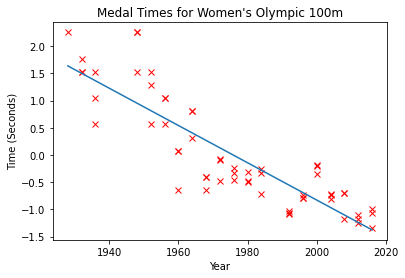

In [295]:
# Assign x and y and shape them into a column vector
x = np.array(data.Year.values).reshape(-1, 1).astype(float)
y = np.array(data.Result.values).reshape(-1, 1).astype(float)
y -= y.mean()
y /= y.std()

# Create design matrix
X = np.hstack((np.ones_like(x), x))

# Solve system of equations
w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y))

# Plot data and line of best fit
plt.plot(x, y, 'rx')
plt.plot(x, np.dot(X, w))
plt.title('Medal Times for Women\'s Olympic 100m')
plt.xlabel('Year')
plt.ylabel('Time (Seconds)')
plt.show()

The manual implementation of linear regression is much more flexible than the scipy implementation at the cost of a little greater complexity in understanding. The numpy model also tends to run very slightly faster on average, as shown below

In [296]:
# Number of iterations to average over
num_tests = 1000

numpy_times = []
for i in range(num_tests):
    start_time = time.time()
    X = np.hstack((np.ones_like(x), x))
    w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y))
    numpy_times.append(time.time() - start_time)

print(f'Mean runtime of numpy over {num_tests} tests: {np.mean(numpy_times):.7f}s')

# Reshape x and y to fit scipy requirements
x_scipi = x.reshape(-1)
y_scipi = y.reshape(-1)

scipy_times = []
for i in range(num_tests):
    start_time = time.time()
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_scipi, y_scipi)
    scipy_times.append(time.time() - start_time)

print(f'Mean runtime of scipy over {num_tests} tests: {np.mean(scipy_times):.7f}s')

Mean runtime of numpy over 1000 tests: 0.0000194s
Mean runtime of scipy over 1000 tests: 0.0001463s


To enxtend this example to implement the basis functions discussed before, we can slightly modify the method.

### Exercise

Predict what the line of best fit will look like for `num_basis = len(x)`. Then try it and see if you were right

58


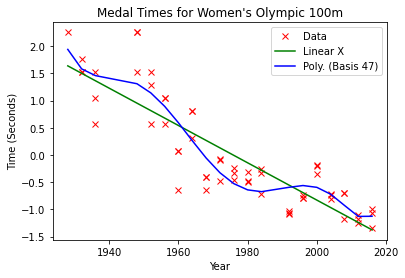

In [307]:
def polynomial(x, num_basis=4, data_limits=[-1., 1.]):
    # Standardise input
    centre = np.mean(data_limits)
    span = np.ptp(data_limits)    # Get min and max values in an array
    z = x - centre
    z = 2*z/span

    # Calculate Phi(x) function
    Phi = np.zeros((x.shape[0], num_basis))
    for i in range(num_basis):
        Phi[:, i:i+1] = x**i
    return Phi

num_basis = 47
Phi = polynomial(x, num_basis=num_basis, data_limits=[min(x), max(x)])
w_poly = np.linalg.solve(np.dot(Phi.T, Phi), np.dot(Phi.T, y))

plt.plot(x, y, 'rx', label='Data')
plt.plot(x, np.dot(X, w), 'g-', label='Linear X')
plt.plot(x, np.dot(Phi, w_poly), 'b-', label=f'Poly. (Basis {num_basis})')
plt.title('Medal Times for Women\'s Olympic 100m')
plt.ylabel('Time (Seconds)')
plt.xlabel('Year')
plt.legend()
plt.show()

## Making a Prediction

Making a prediction for the next year's marathon. In 2020, Eliud Kipchoge won the men's marathon with a time of 2:08:38. Let's see how our predictions line up with that

In [298]:
year = 2020

true_time = convert_to_seconds('2:08:38')
print(f'True Time: {true_time}s')

linear_pred = np.dot(np.array([1, 2020]).T, w)
print(f'Linear prediction: {linear_pred.item():.2f}s\n\tError: {true_time - linear_pred.item():.2f}s')

basis_year = polynomial(np.array([year]), num_basis=num_basis, data_limits=[min(x), 2020])
basis_pred = np.dot(basis_year, w_poly)
print(f'Basis {num_basis} prediction: {basis_pred.item():.2f}s\n\tError: {true_time - basis_pred.item():.2f}s')

True Time: 7718s
Linear prediction: -1.51s
	Error: 7719.51s
Basis 50 prediction: nans
	Error: nans


/home/liam/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)
/home/liam/.local/lib/python3.8/site-packages/numpy/core/_methods.py:275: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  umr_maximum(a, axis, None, out, keepdims),
/home/liam/.local/lib/python3.8/site-packages/numpy/core/_methods.py:276: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with d